<a href="https://colab.research.google.com/github/afham123/Natural-language-Processing/blob/main/Movie_review_positive_or_negative_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving moviereviews2.tsv to moviereviews2.tsv


In [3]:
df=pd.read_csv('moviereviews2.tsv',sep='\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [5]:
df.isnull().sum()

label      0
review    20
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

label     0
review    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


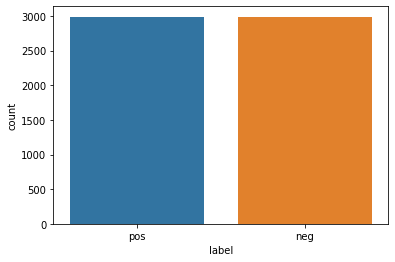

In [8]:
sns.countplot(df['label'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5980 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5980 non-null   object
 1   review  5980 non-null   object
dtypes: object(2)
memory usage: 300.2+ KB


In [11]:
print(df['review'][0])

I loved this movie and will watch it again. Original twist to Plot of Man vs Man vs Self. I think this is Kurt Russell's best movie. His eyes conveyed more than most actors words. Perhaps there's hope for Mankind in spite of Government Intervention?


In [12]:
blanks=[]

for i,lb,rv in df.itertuples():
  if rv.isspace():
    blanks.append(i)

In [13]:
blanks

[]

In [14]:
df.drop(blanks,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [16]:
X=df['review']
y=df['label']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf=Pipeline([('tfid',TfidfVectorizer()),('clf',LinearSVC())],verbose=1)
text_clf.fit(X_train,y_train)

[Pipeline] .............. (step 1 of 2) Processing tfid, total=   0.6s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s


Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                

In [22]:
predictions=text_clf.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.94      0.92      0.93       907
         pos       0.92      0.93      0.93       887

    accuracy                           0.93      1794
   macro avg       0.93      0.93      0.93      1794
weighted avg       0.93      0.93      0.93      1794



In [24]:
print(confusion_matrix(y_test,predictions))

[[835  72]
 [ 58 829]]


In [25]:
print(accuracy_score(y_test,predictions))

0.927536231884058
